# Deteksi Komunitas Facebook

In [11]:
!pip install networkx
!pip install matplotlib
!pip install numpy
!pip install python-louvain
!pip install pyvis

===== RINGKASAN DATA FACEBOOK COMBINED =====
Total Baris Data (TXT):           88234
Total Node (Akun):                4039
Total Edge (Pertemanan):          88234
Total Degree (Total Hubungan):    176468
Rata-rata Degree per Node:        43.69

Jumlah Komunitas Terdeteksi : 15 

===== DAFTAR JUMLAH ANGGOTA SETIAP KOMUNITAS =====
Komunitas 0: 350 anggota
Komunitas 1: 457 anggota
Komunitas 8: 435 anggota
Komunitas 3: 423 anggota
Komunitas 4: 535 anggota
Komunitas 5: 323 anggota
Komunitas 6: 128 anggota
Komunitas 13: 548 anggota
Komunitas 10: 73 anggota
Komunitas 11: 237 anggota
Komunitas 12: 60 anggota
Komunitas 14: 206 anggota
Komunitas 7: 226 anggota
Komunitas 9: 19 anggota
Komunitas 2: 19 anggota

===== KOMUNITAS TERBESAR =====
ID Komunitas: 13
Jumlah Anggota: 548



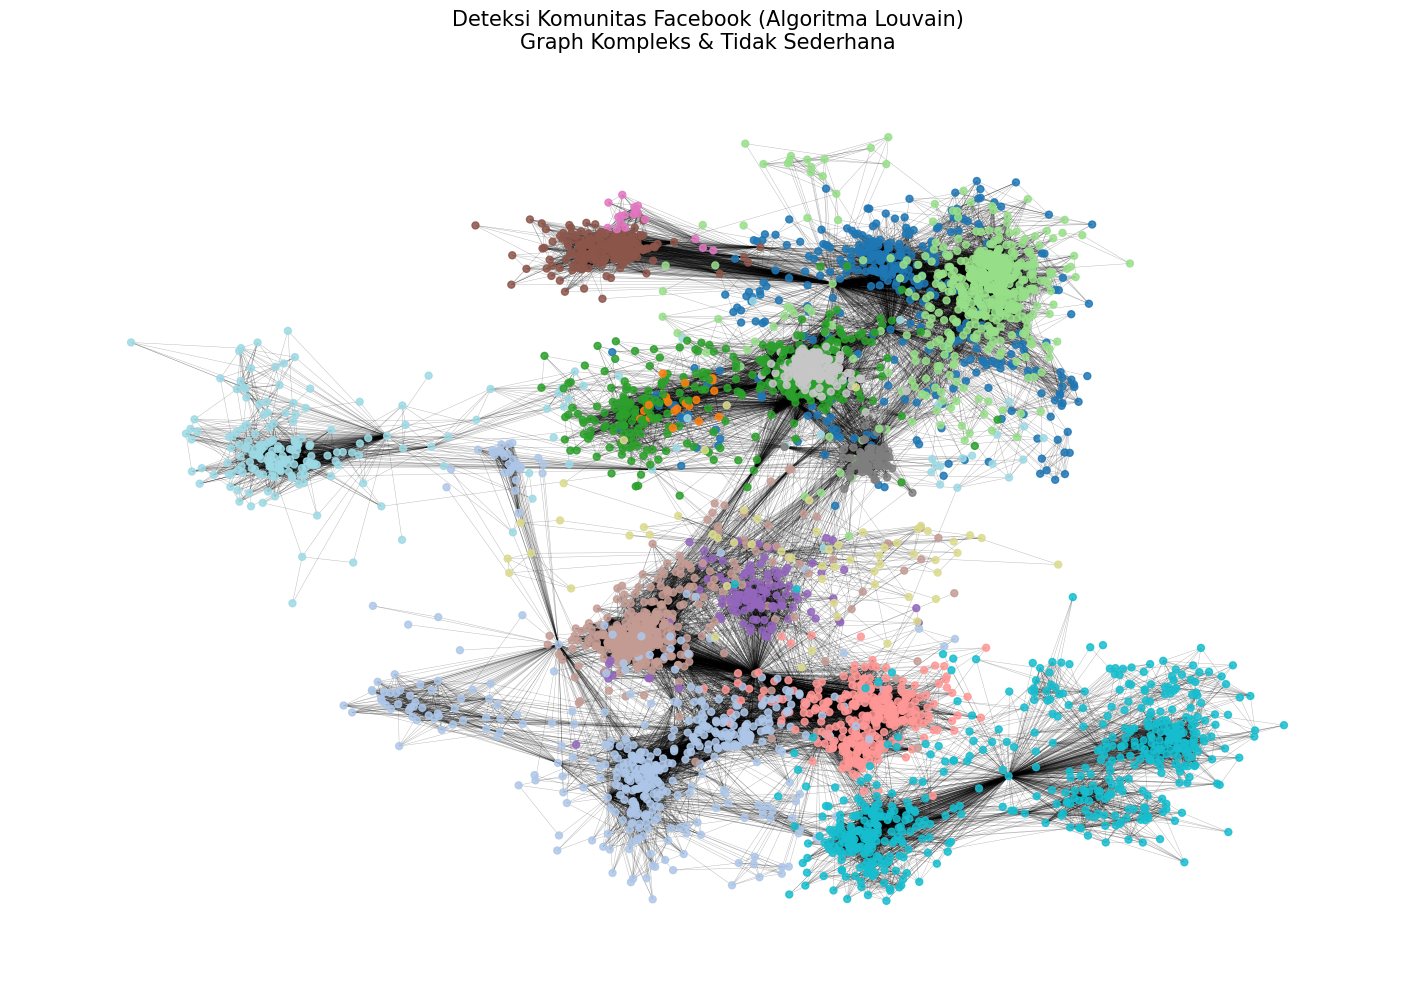

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
from collections import defaultdict
import numpy as np
import random

# -----------------------------------------------------------
# 1. Load dataset facebook_combined
# -----------------------------------------------------------
path = "facebook_combined.txt"

with open(path, "r") as f:
    total_rows = sum(1 for line in f)

G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)

total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
total_degree = sum(dict(G.degree()).values())

print("===== RINGKASAN DATA FACEBOOK COMBINED =====")
print(f"Total Baris Data (TXT):           {total_rows}")
print(f"Total Node (Akun):                {total_nodes}")
print(f"Total Edge (Pertemanan):          {total_edges}")
print(f"Total Degree (Total Hubungan):    {total_degree}")
print(f"Rata-rata Degree per Node:        {total_degree/total_nodes:.2f}")
print("=============================================\n")


# -----------------------------------------------------------
# 2. Deteksi komunitas (Algoritma Louvain)
# -----------------------------------------------------------
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))

print("Jumlah Komunitas Terdeteksi :", num_communities, "\n")


# -----------------------------------------------------------
# 3. Buat daftar anggota setiap komunitas
# -----------------------------------------------------------
communities = defaultdict(list)

for node, comm_id in partition.items():
    communities[comm_id].append(node)

print("===== DAFTAR JUMLAH ANGGOTA SETIAP KOMUNITAS =====")
for comm_id, members in communities.items():
    print(f"Komunitas {comm_id}: {len(members)} anggota")
print("==================================================\n")


# -----------------------------------------------------------
# 4. Cari komunitas terbesar
# -----------------------------------------------------------
largest_comm = max(communities, key=lambda c: len(communities[c]))

print("===== KOMUNITAS TERBESAR =====")
print(f"ID Komunitas: {largest_comm}")
print(f"Jumlah Anggota: {len(communities[largest_comm])}")
# print("Anggota komunitas terbesar:")
# print(communities[largest_comm])      # daftar node
print("================================\n")


# -----------------------------------------------------------
# 5. Visualisasi 2D graph
# -----------------------------------------------------------
plt.figure(figsize=(18, 12))

pos = nx.spring_layout(G, k=0.15, iterations=50)
colors = [partition[node] for node in G.nodes()]

nx.draw_networkx_nodes(
    G, pos,
    node_size=25,
    node_color=colors,
    cmap=plt.cm.tab20,
    alpha=0.85
)

nx.draw_networkx_edges(
    G, pos,
    width=0.3,
    alpha=0.3
)

plt.title("Deteksi Komunitas Facebook (Algoritma Louvain)\nGraph Kompleks & Tidak Sederhana", fontsize=15)
plt.axis('off')
plt.show()

In [13]:
# ============================================================
# LIST ANGGOTA AKUN DI SETIAP KOMUNITAS
# ============================================================

print("\n=== DAFTAR ANGGOTA SETIAP KOMUNITAS ===\n")

# Kelompokkan node berdasarkan ID komunitas
komunitas_dict = {cid: [] for cid in set(partition.values())}

for node, cid in partition.items():
    komunitas_dict[cid].append(node)

# Tampilkan semua komunitas + anggota
for cid, members in komunitas_dict.items():
    print(f"\nKomunitas {cid} — Jumlah anggota: {len(members)}")
    print("Anggota:", members)


=== DAFTAR ANGGOTA SETIAP KOMUNITAS ===


Komunitas 0 — Jumlah anggota: 350
Anggota: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 20

In [14]:
# 5. Menampilkan koneksi setiap akun (1–4039)
print("\n=== DAFTAR KONEKSI SETIAP AKUN (1–4039) ===\n")

for node in sorted(G.nodes()):
    neighbors = list(G.neighbors(node))
    print(f"Akun {node} terhubung ke:{neighbors}")


=== DAFTAR KONEKSI SETIAP AKUN (1–4039) ===

Akun 0 terhubung ke:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 2